In [ ]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
widgets.IntSlider()

In [2]:
def check_auth_name(phrase):
    for w in phrase.split():
        if len(w)<3:
            return True
        
def invalid_term(phrase):
    if (len(phrase)<=3) or (len(phrase.split())>3) or (check_auth_name(phrase)): #or (len(phrase.split())==1)
        return True
    
    for w in phrase.split():
        if not w.isalpha():
            return True
    return False

In [3]:
import pickle
def save_obj(obj, name):
    pickle.dump(obj,open(name + '.pkl', 'wb'), protocol=4)
    
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# Load data

In [4]:
# load texts
ds = pd.read_csv('articles_for_term_extraction.csv')
ds.head()

,author,title,abstract,articles,references,num_symbols,num_words,num_sentences
0,SC Zhi,(The impact and future of edible landscapes on...,: edible landscape urban development sustainab...,urban forestry & urban greening journal homepa...,references acga (2022). what is a community ga...,49261,6104,535
1,SC Tak,(A bibliometric analysis of building informati...,: building information modelling developing co...,heliyon journal homepage: review article bibli...,references questionnaires interviews delphi me...,11129,1494,128
2,SC Can,(Sustainability Transitions in the Constructio...,sustainability transition constitutes an impor...,review sustainability transitions construction...,"references in documents to 20, which yielded 4...",26845,2985,258
3,SC Mat,(International Journal for Quality research),this article is based on a systematic research...,international journal quality research () – is...,"references: abdul-hamid, a. q., ali, m. h., os...",40355,4933,660
4,SC Zhe,(A review of integration between BIM and CFD f...,: building information modeling (bim) computat...,building environment journal homepage: review ...,"references [1] m. santamouris, a. synnefa, t. ...",56176,7064,449


In [5]:
# Создаем два новых DataFrame, фильтруя исходный датасет
area = 'CE'
ds = ds[ds['author'].str.startswith(area)]
#ds_ce = ds[ds['author'].str.startswith('CE')]

print(f"{area} Articles:")
print(ds.head())
print(f"\nNumber of {area} articles:", len(ds))

#print("\nCE Articles:")
#print(ds_ce.head())
#print("\nNumber of CE articles:", len(ds_ce))

#ds_sc.to_csv('SC_Articles.csv', index=False)
#ds_ce.to_csv('CE_Articles.csv', index=False)

CE Articles:
     author                                              title  \
233  CE Far  (Circulating the E-Waste Recovery from the Con...   
234  CE Wen  (New insights into the green cement composites...   
235  CE Kaz  (Identification of parameters and indicators f...   
236  CE San  journal of polymers and the environment https:...   
237  CE Sza  (A Critical Review on Modification Methods of ...   

                                              abstract  \
233  : material flow analysis; circular economy; e-...   
234  : biochar carbon emission reduction cement add...   
235  circular economy circular built environment ci...   
236  end-of-life treatment of construction, renovat...   
237  : cement composites; nanocellulose; nanomateri...   

                                              articles  \
233  review circulating e-waste recovery constructi...   
234  resources, conservation & recycling journal ho...   
235  kazmi chakraborty journal engineering applied ...   
236  jour

In [6]:
text = ' '.join(list(ds.articles.values))
#text

In [7]:
#routine to remove punctuation, taken from https://blog.enterprisedna.co/python-remove-punctuation-from-string/#:~:text=To%20remove%20punctuation%20from%20a,new%20string%20excluding%20punctuation%20marks.

import string

def remove_punctuation(input_string):
    # Make a translation table that maps all punctuation characters to None
    translator = str.maketrans("", "", string.punctuation)

    # Apply the translation table to the input string
    result = input_string.translate(translator)

    return result

# Approach from Medium.com

## TextRank

In [8]:
# python snippet for pytextrank
import spacy
import pytextrank

# load a english model
nlp = spacy.load("en_core_web_sm")

/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages


In [9]:
#remove stopwords
text = remove_punctuation(text)
text = text.lower()
print('Initial text size:', len(text))
all_stopwords = nlp.Defaults.stop_words
text = ' '.join([w for w in text.split() if w not in all_stopwords])

print('Text size after stopword removal:', len(text))

Initial text size: 3498606
Text size after stopword removal: 3323623


In [10]:
all_stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [11]:
for w in text.split():
    if 'which' in w:
        print(w)

hand—which
—which
whichever
analysis—which


In [12]:
# add pytextrank to the pipe
nlp.add_pipe("textrank")

In [13]:
nlp.max_length = 500000000
doc = nlp(text)

textrank_keyphrases = doc._.phrases

In [14]:
len(textrank_keyphrases)

60789

In [15]:
# Установка порога для ранга, например, 75-й перцентиль значений ранга
rank_threshold = np.percentile([phrase.rank for phrase in textrank_keyphrases], 55)

# Фильтрация терминов по порогу ранга
textrank_keyphrases_high_rank = [phrase.text for phrase in textrank_keyphrases if phrase.rank >= rank_threshold]
len(textrank_keyphrases_high_rank)

27355

In [16]:
def check_auth_name(phrase):
    for w in phrase.split():
        if len(w)<3:
            return True
        
def invalid_term(phrase):
    if (len(phrase)<=3) or (len(phrase.split())>3) or (check_auth_name(phrase)): #or (len(phrase.split())==1)
        return True
    
    for w in phrase.split():
        if not w.isalpha():
            return True
    return False

#term_list = [term.text for term in textrank_keyphrases_high_rank if ('al.' not in term.text)&
             #(not invalid_term(term.text))]
#term_list = list(set(term_list))
#term_list

term_list = [term for term in textrank_keyphrases_high_rank if ('al.' not in term) and (not invalid_term(term))]
term_list = list(set(term_list))  # Удаление дубликатов
term_list

['life structures materials',
 'wood construction',
 'geographical exclusion review',
 'heavy light wastes',
 'framework software tools',
 'lifespan building shm',
 'energy services providers',
 'dif ferent materials',
 'trilliondollar industry',
 'circular design cristiano',
 'production components',
 'recycled solar panels',
 'acceptable environmental method',
 'higher environmental impacts',
 'life cycle perspective',
 'common pulping process',
 'review issues',
 'nanocellulose materials',
 'system expansion substitution',
 'product quality',
 'different concepts',
 'archaeology impacts authors',
 'ing plastic consumption',
 'endoflife phase methods',
 'energy money',
 'strategies lifecycle stages',
 'review steel type',
 'principle integrated buildings',
 'comparative analysis literature',
 'participate hydration process',
 'reductions physical life',
 'laser printing process',
 'environmental impacts buildings',
 'new comprehensive strategy',
 'recycling rates',
 'online productio

In [17]:
invalid_term('terminthesummarytext.therequirementexiststhatthereareatleasttwosummaries')

True

In [18]:
len(term_list)

7045

In [19]:
term_list.sort()
term_list[1:200]

['ability construction',
 'ability construction building',
 'ability waste',
 'able adaptable buildings',
 'able buildings',
 'able construction material',
 'able construction materials',
 'able economy',
 'ablers identiﬁed study',
 'abn building',
 'aboveground building volume',
 'abovementioned types frameworks',
 'absolute coordinate system',
 'absorbed lifetime building',
 'abstract articles',
 'abstract screening studies',
 'abundant materials',
 'academia construction industry',
 'academic articles',
 'academic articles publications',
 'academic literature cases',
 'academic literature fig',
 'academic papers',
 'academic research database',
 'academic research identifies',
 'academic researches results',
 'academic studies',
 'accelerate cement hydration',
 'acceptable environmental method',
 'access article',
 'access parts building',
 'access products',
 'access resources',
 'access tangible products',
 'accessible developing countries',
 'account environmental impacts',
 'ach

## Find definitions

In [20]:
from nltk.corpus import wordnet as wn

In [21]:
wn.synsets('academic')

[Synset('academician.n.03'),
 Synset('academic.a.01'),
 Synset('academic.s.02'),
 Synset('academic.s.03')]

In [22]:
import wikipedia

In [23]:
wiki_definitions = []
for term in tqdm(term_list):
    try:
        pg = wikipedia.page(title=term, auto_suggest=False)
        definition = pg.summary[:pg.summary.index('\n')]
        wiki_definitions.append(definition)
    except:
        wiki_definitions.append('NA')

  0%|          | 0/7045 [00:00<?, ?it/s]

/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [24]:
wiki_definitions.count('NA')/len(wiki_definitions)

0.9550035486160398

In [25]:
fltr = np.array(wiki_definitions) != 'NA'
term_list = np.array(term_list)[fltr]

In [26]:
list(term_list)
len(term_list)

317

In [27]:
save_obj([wiki_definitions, term_list], f'textrank_{area}_wikis')

# Чтобы заново не находить wiki definitions

In [28]:
loaded_data = load_obj(f'textrank_{area}_wikis')

# Extract only the `wiki_definitions`
wiki_definitions_loaded = loaded_data[0]

# Verify the loaded data
print(len(wiki_definitions_loaded))
print(wiki_definitions_loaded[:10])

7045
['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']


## Find Context

In [29]:
text = ' '.join(list(ds.articles.values)).lower()

context_sent = []
for term in tqdm(term_list):
    for sentence in text.split('. '):
        found = False
        if term in sentence:
            context_sent.append(sentence)
            print('term:', term)
            print('sentence:', sentence)
            print()
            found = True
            break
    if not found:
        context_sent.append('NA')

  0%|          | 0/317 [00:00<?, ?it/s]

term: academic papers
sentence: conducted systematic literature review april retrieving analyzing relevant academic papers web science (wos)

term: aerospace industry
sentence: aerospace industry, shown aircraft landing gear ribs could produced using buildings , , x peer review extrusion nozzle

term: aging process
sentence: hardened concrete reacts air, starts aging process called carbonation

term: agricultural waste
sentence: therefore, evaluation adsorption potential different types waste materi- als agricultural waste, industrial waste, cdw heavy metal treatment become emerging research area (amin et al

term: analyses
sentence: material ﬂow analysis complementary procedure analyses stocks ﬂows materials circulating throughout supply chain identify optimise sustainability characteristics supply chain []

term: analysis
sentence: keywords: material flow analysis; circular economy; e-wastes; construction demolition industries; policy recommendations citation: farjana, s.h

term: app

In [30]:
len(context_sent)

317

## Prepare dataframe

In [31]:
ds_textrank_terms = pd.DataFrame()

In [32]:
ds_textrank_terms['term'] = term_list
ds_textrank_terms['definition_wiki'] = np.array(wiki_definitions)[fltr]
ds_textrank_terms['context'] = context_sent
ds_textrank_terms.head()

,term,definition_wiki,context
0,academic papers,Academic publishing is the subfield of publish...,conducted systematic literature review april r...
1,aerospace industry,An aerospace manufacturer is a company or indi...,"aerospace industry, shown aircraft landing gea..."
2,aging process,Ageing (or aging in American English) is the p...,"hardened concrete reacts air, starts aging pro..."
3,agricultural waste,Agricultural waste are plant residues from agr...,"therefore, evaluation adsorption potential dif..."
4,analyses,Analysis (pl.: analyses) is the process of bre...,material ﬂow analysis complementary procedure ...


## Check semantic closeness of the terms to the NLP

In [33]:
#ds_sc.articles.values[0]

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

In [36]:
# select model from https://www.sbert.net/docs/pretrained_models.html
model_emb = SentenceTransformer('distiluse-base-multilingual-cased-v1')

def similarity_measure(text1, text2):
    # based on https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1
    text_embeddings = model_emb.encode([text1, text2])
    sim_score = cosine_similarity(text_embeddings[0].reshape(1, -1), text_embeddings[1].reshape(1, -1))
    
    return sim_score[0][0]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

/home/sh.aubakirov/.conda/envs/nu_kbtu/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [37]:
text1 = ds.articles.values[0]
simty = [similarity_measure(text1, text2) for text2 in tqdm(ds_textrank_terms.definition_wiki.values)]

  0%|          | 0/317 [00:00<?, ?it/s]

In [38]:
ds_textrank_terms['NLP_similarity'] = simty

<Axes: >

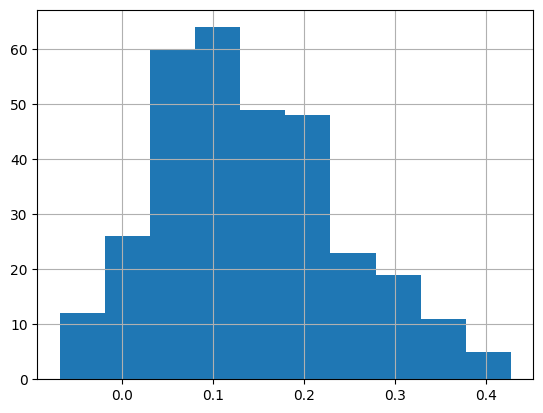

In [39]:
ds_textrank_terms['NLP_similarity'].hist()

In [40]:
ds_textrank_terms['NLP_similarity'].describe()

count    317.000000
mean       0.139480
std        0.100125
min       -0.068824
25%        0.068928
50%        0.126472
75%        0.196608
max        0.427581
Name: NLP_similarity, dtype: float64

In [41]:
ds_textrank_terms.term.values[ds_textrank_terms['NLP_similarity'] >= 0.10]

array(['academic papers', 'aerospace industry', 'agricultural waste',
       'applied materials', 'architectural design', 'bending strength',
       'building', 'building construction', 'building demolition',
       'building industry', 'building project', 'building projects',
       'building research establishment', 'building standards',
       'buildings', 'built environment', 'carbon dioxide emissions',
       'carbon emission', 'carbon emissions', 'carbon reduction',
       'case studies', 'cement', 'cements', 'chemical products',
       'chemical structure', 'circular economics', 'circular economies',
       'circular economy', 'citation analysis', 'civil construction',
       'climate change impacts', 'compressive strength', 'concrete slab',
       'concrete slabs', 'concrete strength', 'construction',
       'construction companies', 'construction industry',
       'construction management', 'construction material',
       'construction materials', 'construction methods',
     

In [42]:
ds_textrank_terms.sort_values(by="NLP_similarity", ascending=False, inplace=True)

In [43]:
ds_textrank_terms.term.values

array(['construction waste', 'electronic waste', 'energy reuse',
       'environmental assessment', 'resource recovery',
       'recycling technology', 'recycling industry', 'recycled material',
       'recyclable materials', 'waste recycling', 'recycled materials',
       'renewable resource', 'renewable resources', 'green buildings',
       'sustainable building', 'organic waste', 'life cycle assessment',
       'life cycle analysis', 'waste hierarchy', 'review paper',
       'review article', 'resource scarcity', 'renewable energy',
       'renewable energy production', 'renewable energy sources',
       'plastics recycling', 'recycled plastics', 'agricultural waste',
       'systematic review', 'systematic reviews', 'scoping review',
       'systematic literature review', 'building demolition',
       'environmental degradation', 'building research establishment',
       'literature review', 'literature reviews', 'recycled timber',
       'waste collection', 'high potential', 'buil

In [44]:
# get term ranks
ranks = []
for term in ds_textrank_terms.term.values:
    for key_phr in textrank_keyphrases:
        if term == key_phr.text:
            ranks.append(key_phr.rank)
            break
            
ranks[:10]

[0.044532834183678295,
 0.03178300392746936,
 0.027133614883489955,
 0.0246723292641823,
 0.023149068675498267,
 0.026659146819104848,
 0.02954229263577603,
 0.0452713989781561,
 0.04052293159796855,
 0.03583550359231481]

In [45]:
ds_textrank_terms['rank'] = ranks
ds_textrank_terms.head()

,term,definition_wiki,context,NLP_similarity,rank
62,construction waste,Construction waste or debris is any kind of de...,kazmi chakraborty journal engineering applied ...,0.427581,0.044533
85,electronic waste,Electronic waste (or e-waste) describes discar...,review circulating e-waste recovery constructi...,0.422629,0.031783
96,energy reuse,Energy recycling is the energy recovery proces...,"recycling requires energy reuse, potentially n...",0.387455,0.027134
103,environmental assessment,Environmental Impact assessment (EIA) is the a...,"using bim-based framework, economic environmen...",0.386762,0.024672
242,resource recovery,Resource recovery is using wastes as an input ...,identify assess important circularity indicato...,0.383116,0.023149


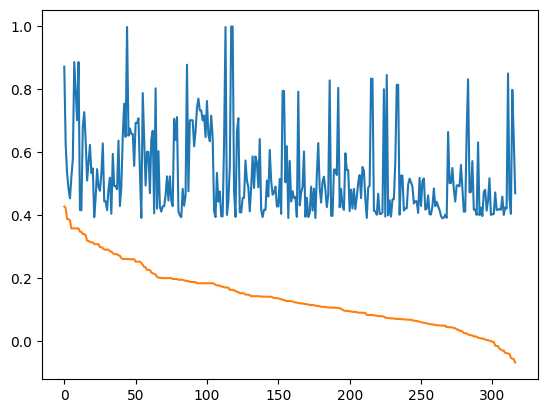

In [46]:
plt.plot(ds_textrank_terms['rank'].values/ds_textrank_terms['rank'].values.max())
plt.plot(ds_textrank_terms.NLP_similarity.values)

## Save work

In [47]:
save_obj(ds_textrank_terms, f'ds_{area}_textrank_terms')

In [49]:
ds_textrank_terms.to_excel(f'ds_{area}_textrank_terms.xlsx')

In [50]:
ds_textrank_terms

,term,definition_wiki,context,NLP_similarity,rank
62,construction waste,Construction waste or debris is any kind of de...,kazmi chakraborty journal engineering applied ...,0.427581,0.044533
85,electronic waste,Electronic waste (or e-waste) describes discar...,review circulating e-waste recovery constructi...,0.422629,0.031783
96,energy reuse,Energy recycling is the energy recovery proces...,"recycling requires energy reuse, potentially n...",0.387455,0.027134
103,environmental assessment,Environmental Impact assessment (EIA) is the a...,"using bim-based framework, economic environmen...",0.386762,0.024672
242,resource recovery,Resource recovery is using wastes as an input ...,identify assess important circularity indicato...,0.383116,0.023149
...,...,...,...,...,...
133,final product,"In production, a final product or finished pro...",benefits prefabrication include higher quality...,-0.041862,0.023096
63,consumer economy,A consumer economy describes an economy driven...,conventional “linear” supply chain currently u...,-0.052968,0.020626
156,linear material,Linear elasticity is a mathematical model of h...,goal initiative reduce construction-consumptio...,-0.056845,0.040773
200,product design,Product design is the process of creating new ...,"practice, ce also operationalized three produc...",-0.058067,0.032877
